In [6]:
import keras
import keras
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.preprocessing.image import array_to_img, img_to_array, list_pictures, load_img
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("data_all.csv")
# df.head()

x, t = [], []

for (i, row) in df.iterrows():
    filepath = row['filepath']
    tmp_img = load_img(filepath, target_size=(32,32))
    img = img_to_array(tmp_img) / 255.0 # -> float32 + 正規化
    
    # データに追加
    x.append(img)
    t.append(row['label'])
    
# numpyに変換
x = np.array(x, 'f')

# x.shape

# クラスの形式を変換 <- one-hot表現
t = np_utils.to_categorical(t, 2)

# 学習用データとテストデータ
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.33, random_state=1)



Train on 824 samples, validate on 406 samples
Epoch 1/100
824/824 [==============================] - 13s 16ms/step - loss: 0.6897 - acc: 0.5607 - val_loss: 0.6762 - val_acc: 0.5764
Epoch 2/100
824/824 [==============================] - 11s 14ms/step - loss: 0.6696 - acc: 0.6141 - val_loss: 0.6582 - val_acc: 0.6084
Epoch 3/100
824/824 [==============================] - 12s 14ms/step - loss: 0.6445 - acc: 0.6396 - val_loss: 0.6594 - val_acc: 0.6305
Epoch 4/100
824/824 [==============================] - 12s 14ms/step - loss: 0.6324 - acc: 0.6444 - val_loss: 0.6453 - val_acc: 0.6305
Epoch 5/100
824/824 [==============================] - 11s 13ms/step - loss: 0.6179 - acc: 0.6420 - val_loss: 0.6909 - val_acc: 0.6330
Epoch 6/100
824/824 [==============================] - 11s 14ms/step - loss: 0.6245 - acc: 0.6578 - val_loss: 0.6706 - val_acc: 0.5911
Epoch 7/100
824/824 [==============================] - 12s 15ms/step - loss: 0.6128 - acc: 0.6675 - val_loss: 0.6634 - val_acc: 0.6256
Epoch 8/1

Epoch 61/100
824/824 [==============================] - 11s 13ms/step - loss: 0.0377 - acc: 0.9818 - val_loss: 2.0205 - val_acc: 0.6158
Epoch 62/100
824/824 [==============================] - 13s 15ms/step - loss: 0.0360 - acc: 0.9854 - val_loss: 2.1981 - val_acc: 0.6576
Epoch 63/100
824/824 [==============================] - 12s 15ms/step - loss: 0.0266 - acc: 0.9891 - val_loss: 2.3564 - val_acc: 0.6059
Epoch 64/100
824/824 [==============================] - 17s 21ms/step - loss: 0.0104 - acc: 0.9964 - val_loss: 2.5169 - val_acc: 0.6453
Epoch 65/100
824/824 [==============================] - 17s 20ms/step - loss: 0.0055 - acc: 0.9988 - val_loss: 2.4372 - val_acc: 0.6601
Epoch 66/100
824/824 [==============================] - 13s 16ms/step - loss: 0.0094 - acc: 0.9951 - val_loss: 2.6393 - val_acc: 0.6453
Epoch 67/100
824/824 [==============================] - 11s 14ms/step - loss: 0.0143 - acc: 0.9939 - val_loss: 2.4048 - val_acc: 0.6601
Epoch 68/100
824/824 [==========================

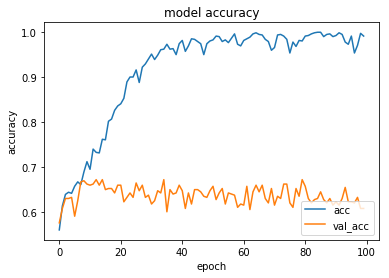

In [7]:
# CNNを構築
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(64, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))       # クラスは2個
model.add(Activation('softmax'))

# コンパイル
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

# 実行。出力はなしで設定(verbose=0)。
history = model.fit(x_train, t_train, batch_size=10, epochs=100,
                   validation_data = (x_test, t_test))

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['acc', 'val_acc'], loc='lower right')
plt.show()